# Inleveropdracht 1: Cleaning & Counting
#### Naam: Lucas van der Horst
#### Studentnummer: 1757028

## Deel 1: Cleaning

1. Start een Jupyter Notebook en importeer NLTK

In [1]:
import nltk

2. Download de Twitter dataset `twitter_samples` uit `nltk.corpus` d.m.v. de `download` functie van NLTK.

In [2]:
nltk.download('twitter_samples')
twitter_samples = nltk.corpus.twitter_samples

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/horstl/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


3. Bestudeer de dataset. Welke soorten data zitten er in de set en hoe is die gestructureerd?

De dataset bestaat uit 3 json bestanden. Een bestand met positieve tweets, een bestand met negatieve tweets en een bestand met allerlei tweets. De tweets zijn gestructureerd zodat elke regel een json dictionary is die een tweet representeerd. Deze heeft veel metadata en de tweet tekst zelf.  
Maar met nltk kunnen we ook alleen de teksten direct laden.

In [3]:
# load positive tweets
positive_tweets = twitter_samples.strings('negative_tweets.json')
# load negative tweets
negative_tweets = twitter_samples.strings('positive_tweets.json')

# print a sample of both
print('Positive tweets:\n- ', end='')
print('\n- '.join(positive_tweets[0:5]))
print('\nNegative tweets:\n- ', end='')
print('\n- '.join(negative_tweets[0:5]))

# print the number of positive and negative tweets
print()
print(f'Number of positive tweets: {len(positive_tweets)}')
print(f'Number of negative tweets: {len(negative_tweets)}')

Positive tweets:
- hopeless for tmr :(
- Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
- @Hegelbon That heart sliding into the waste basket. :(
- “@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too
- Dang starting next week I have "work" :(

Negative tweets:
- #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
- @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
- @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
- @97sides CONGRATS :)
- yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days

Number of positive tweets: 5000
Number of negative tweets: 5000


4. Maak een tweet cleaning functie die de tekst van een tweet gaat cleanen en uiteindelijk een list van alle relevante woordstammen moet opleveren. De eerste stap is hyperlinks, 'RT', en de hash van hashtags '#' uit de strings te verwijderen. Leg in je eigen woorden uit waarom we deze willen verwijderen.

Ons doel is om te classificeren of een tweet positief of negatief is. En hyperlinks, retweets en hashtags hebben hier niets mee te maken.  
Daarom moeten we deze eruit halen.

In [4]:
import re

def clean_tweet(tweet):
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/[^\s]*[\r]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # Remove `RT`
    tweet = re.sub(r'RT[\s]+', '', tweet)
    
    return tweet

# clean the tweets
positive_tweets_clean = [clean_tweet(tweet) for tweet in positive_tweets]
negative_tweets_clean = [clean_tweet(tweet) for tweet in negative_tweets]

print("\n".join(positive_tweets_clean[0:10]))

hopeless for tmr :(
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
@Hegelbon That heart sliding into the waste basket. :(
“@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too
Dang starting next week I have "work" :(
oh god, my babies' faces :( 
@RileyMcDonough make me smile :((
@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( 
why?:("@tahuodyy: sialan:( 
Athabasca glacier was there in 1948 :-( athabasca glacier jasper jaspernationalpark alberta explorealberta … 


5. Voeg tokenization aan je functie toe (Let op: Maak een kopie van je functie in een nieuwe cell). Gebruik de TweetTokenizer van NLTK om de tweets in woorden te splitsen.

In [5]:
def clean_tweet(tweet):
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/[^\s]*[\r]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # Remove `RT`
    tweet = re.sub(r'RT[\s]+', '', tweet)

    # tokenize with nltk TweetTokenizer
    tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)

    return tokens

# clean the tweets
positive_tweets_clean = [clean_tweet(tweet) for tweet in positive_tweets]
negative_tweets_clean = [clean_tweet(tweet) for tweet in negative_tweets]

print("\n".join(map(str, positive_tweets_clean[0:10])))

['hopeless', 'for', 'tmr', ':(']
['everything', 'in', 'the', 'kids', 'section', 'of', 'ikea', 'is', 'so', 'cute', '.', 'shame', "i'm", 'nearly', '19', 'in', '2', 'months', ':(']
['that', 'heart', 'sliding', 'into', 'the', 'waste', 'basket', '.', ':(']
['“', ':', 'i', 'hate', 'japanese', 'call', 'him', '"', 'bani', '"', ':(', ':(', '”', 'me', 'too']
['dang', 'starting', 'next', 'week', 'i', 'have', '"', 'work', '"', ':(']
['oh', 'god', ',', 'my', 'babies', "'", 'faces', ':(']
['make', 'me', 'smile', ':(', '(']
['work', 'neighbour', 'on', 'motors', '.', 'asked', 'why', 'and', 'he', 'said', 'hates', 'the', 'updates', 'on', 'search', ':(']
['why', '?', ':(', '"', ':', 'sialan', ':(']
['athabasca', 'glacier', 'was', 'there', 'in', '1948', ':-(', 'athabasca', 'glacier', 'jasper', 'jaspernationalpark', 'alberta', 'explorealberta', '…']


6. Voeg toe (elke keer kopiëren!) stopwords en punctuation cleaning: Haal alle entries uit je list die voorkomen in de stopwords list van NLTK en die bestaan uit een van de `punctuation` characters (deze zijn in Python gedefinieerd). Leg weer in je eigen woorden uit waarom we deze willen verwijderen.

We willen de woorden die niet bijdragen aan de betekenis van de tweet eruit halen. Dit zijn de stopwoorden en de leestekens.

In [6]:
import string

nltk.download('stopwords')

def clean_tweet(tweet):
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/[^\s]*[\r]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # Remove `RT`
    tweet = re.sub(r'RT[\s]+', '', tweet)

    # tokenize with nltk TweetTokenizer
    tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)

    # remove stop words and functions
    filter = nltk.corpus.stopwords.words('english') + list(string.punctuation)
    tokens = [word for word in tokens if word not in filter]

    return tokens

# clean the tweets
positive_tweets_clean = [clean_tweet(tweet) for tweet in positive_tweets]
negative_tweets_clean = [clean_tweet(tweet) for tweet in negative_tweets]

print("\n".join(map(str, positive_tweets_clean[0:10])))

[nltk_data] Downloading package stopwords to /home/horstl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['hopeless', 'tmr', ':(']
['everything', 'kids', 'section', 'ikea', 'cute', 'shame', "i'm", 'nearly', '19', '2', 'months', ':(']
['heart', 'sliding', 'waste', 'basket', ':(']
['“', 'hate', 'japanese', 'call', 'bani', ':(', ':(', '”']
['dang', 'starting', 'next', 'week', 'work', ':(']
['oh', 'god', 'babies', 'faces', ':(']
['make', 'smile', ':(']
['work', 'neighbour', 'motors', 'asked', 'said', 'hates', 'updates', 'search', ':(']
[':(', 'sialan', ':(']
['athabasca', 'glacier', '1948', ':-(', 'athabasca', 'glacier', 'jasper', 'jaspernationalpark', 'alberta', 'explorealberta', '…']


7. Voeg stemming toe door middel van de PorterStemmer van NLTK. Leg in je eigen woorden uit waarom we dit doen. Bekijk de stems van een flink aantal woorden en beschrijf wat je opvalt. Zijn er stems die je niet direct zo had voorzien? Waarom zouden die zo gestemmed zijn?

We willen de woorden die dezelfde betekenis hebben maar in een andere vorm zijn geschreven hetzelfde behandelen. Dit doen we door de woorden te stemmen.

In [7]:
def clean_tweet(tweet):
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/[^\s]*[\r]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # Remove `RT`
    tweet = re.sub(r'RT[\s]+', '', tweet)

    # tokenize with nltk TweetTokenizer
    tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)

    # remove stop words and functions
    filter = nltk.corpus.stopwords.words('english') + list(string.punctuation)
    tokens = [word for word in tokens if word not in filter]

    # stemming
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return tokens

# clean the tweets
positive_tweets_clean = [clean_tweet(tweet) for tweet in positive_tweets]
negative_tweets_clean = [clean_tweet(tweet) for tweet in negative_tweets]

print("\n".join(map(str, positive_tweets_clean[0:10])))

['hopeless', 'tmr', ':(']
['everyth', 'kid', 'section', 'ikea', 'cute', 'shame', "i'm", 'nearli', '19', '2', 'month', ':(']
['heart', 'slide', 'wast', 'basket', ':(']
['“', 'hate', 'japanes', 'call', 'bani', ':(', ':(', '”']
['dang', 'start', 'next', 'week', 'work', ':(']
['oh', 'god', 'babi', 'face', ':(']
['make', 'smile', ':(']
['work', 'neighbour', 'motor', 'ask', 'said', 'hate', 'updat', 'search', ':(']
[':(', 'sialan', ':(']
['athabasca', 'glacier', '1948', ':-(', 'athabasca', 'glacier', 'jasper', 'jaspernationalpark', 'alberta', 'explorealberta', '…']


8. Test je functie door hem de tekst van één of twee tweets te geven die duidelijk alle geïmplementeerde stappen laten zien. Print de tweet(s) die je erin stopt en hoe het eruit komt.
Je complete tweet cleaning functie moet nu dus een string als input krijgen en een list van gefilterde woordstammen als output geven.

Dit hebben we bij elke stap al gedaan. Zie hierboven.

## Deel 2: Counting

1. Tel voor ieder woord hoe vaak het voorkomt in negatieve en positieve tweets:   
Maak een dictionary met als keys tuples van elke woordstammen en 0 of 1 voor negatief of positief, en als value een count. 
Vul de dictionary met alle woordstammen uit de positive en negative tweets.

In [8]:
counter = {}

# count the positive words
for tweet in positive_tweets_clean:
    for word in tweet:
        key = (word, 0)
        counter.setdefault(key, 0)
        counter[key] += 1

# count the negative words
for tweet in negative_tweets_clean:
    for word in tweet:
        key = (word, 1)
        counter.setdefault(key, 0)
        counter[key] += 1

2. Test je functie, deze values moeten in de dictionary zitten:  
`('followfriday', 1.0): 25`  
`('shame', 0.0): 19`

In [9]:
assert counter[(('followfriday', 1))] == 25
assert counter[(('shame', 0))] == 19

3. Maak met deze dictionary een list met entries als [woord, pos_count, neg_count]  
Je hoeft dit niet met alle woorden te doen, maar nu in elk geval voor de woorden:  
['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti','❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛','song', 'idea', 'power', 'play', 'magnific']  
Als je wilt kun je er zelf nog een aantal anderen aan toevoegen om straks in de plot te bekijken.  
Test of deze waardes er in zitten:  
['happi', 212, 25],  
['good', 238, 101],  
['bad', 18, 73],  
['sad', 5, 123],  
[':)', 3691, 2],  
[':(', 1, 4584]

In [10]:
from collections import namedtuple

# create a namedtuple for storing relevant data
entry = namedtuple('entry', ['word', 'pos_count', 'neg_count'])
# create a list of words that are interesting to look at
interresting_words = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti', '❤️', ':)', ':(', '😒', '😬', '😄', '😍', '♛', 'song', 'idea', 'power', 'play', 'magnific']

# create a list of entries
word_counts = []
for word in interresting_words:
    pos_count = counter.get((word, 1), 0)
    neg_count = counter.get((word, 0), 0)
    word_counts.append(entry(word, pos_count, neg_count))

# test if the word_counts are correct
assert entry(word='happi', pos_count=212, neg_count=25) in word_counts
assert entry(word='good', pos_count=238, neg_count=101) in word_counts
assert entry(word='bad', pos_count=18, neg_count=73) in word_counts
assert entry(word='sad', pos_count=5, neg_count=123) in word_counts
assert entry(word=':)', pos_count=3691, neg_count=2) in word_counts
assert entry(word=':(', pos_count=1, neg_count=4584) in word_counts

4. Visualiseer deze word counts met een scatter plot d.m.v. matplotlib.pyplot:
- Horizontale as: log positief count
- Verticale as: log negatief count
Verklaar de output in je eigen woorden.

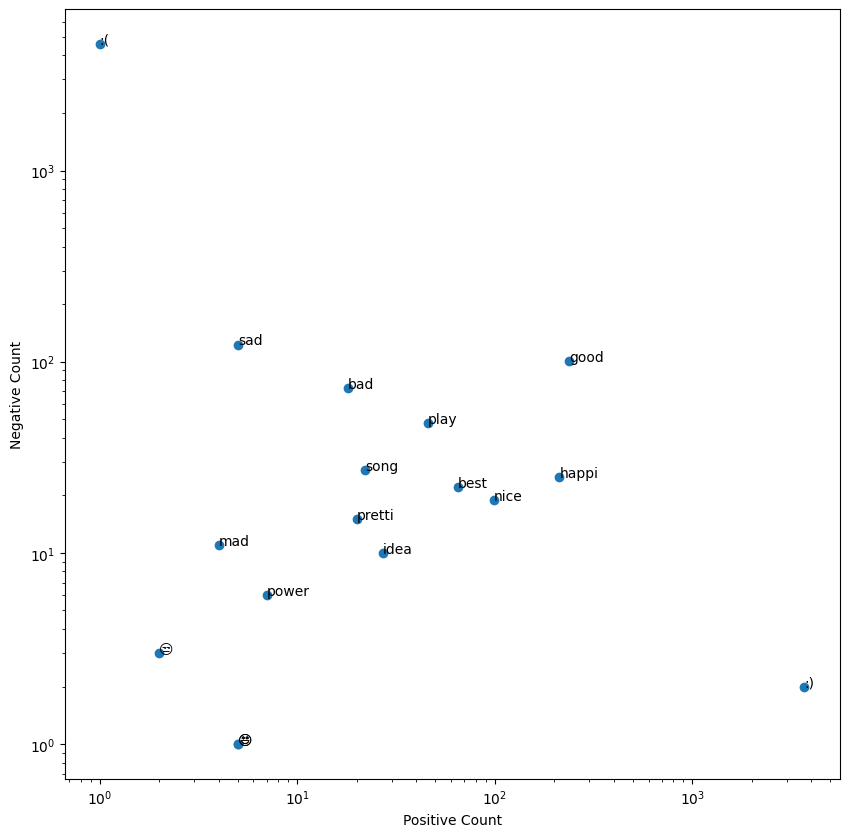

In [11]:
import matplotlib.pyplot as plt

# refactor the data into a format that's easier to plot
x = [word.pos_count for word in word_counts]
y = [word.neg_count for word in word_counts]
labels = [word.word for word in word_counts]

# create the figure with a log scale
plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Positive Count')
plt.ylabel('Negative Count')

# plot the data
plt.scatter(x, y)

# add annotations so we can see what word each dot represents
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]))

plt.show()